In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [47]:
# Define o número máximo de colunas e a largura máxima das colunas para None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [48]:
df = pd.read_csv(r"C:\Users\gusta\OneDrive\Área de Trabalho\Facens\TCC\DataSets\INFLUD23-26-02-2024.csv", delimiter=';')
df.info()

C:\Users\gusta\AppData\Local\Temp\ipykernel_16748\1828006753.py:1: DtypeWarning: Columns (15,18,20,23,53,59,61,63,72,74,79,91,93,109,130,175,178) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\gusta\OneDrive\Área de Trabalho\Facens\TCC\DataSets\INFLUD23-26-02-2024.csv", delimiter=';')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277304 entries, 0 to 277303
Columns: 190 entries, DT_NOTIFIC to TABAG
dtypes: float64(99), int64(7), object(84)
memory usage: 402.0+ MB


In [49]:
df.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,OUTRO_DES,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,MORB_DESC,VACINA,DT_UT_DOSE,MAE_VAC,DT_VAC_MAE,M_AMAMENTA,DT_DOSEUNI,DT_1_DOSE,DT_2_DOSE,ANTIVIRAL,TP_ANTIVIR,OUT_ANTIV,DT_ANTIVIR,HOSPITAL,DT_INTERNA,SG_UF_INTE,ID_RG_INTE,CO_RG_INTE,ID_MN_INTE,CO_MU_INTE,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,RAIOX_RES,RAIOX_OUT,DT_RAIOX,AMOSTRA,DT_COLETA,TP_AMOSTRA,OUT_AMOST,PCR_RESUL,DT_PCR,POS_PCRFLU,TP_FLU_PCR,PCR_FLUASU,FLUASU_OUT,PCR_FLUBLI,FLUBLI_OUT,POS_PCROUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,DS_PCR_OUT,CLASSI_FIN,CLASSI_OUT,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO,OUT_ANIM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TOMO_OUT,DT_TOMO,TP_TES_AN,DT_RES_AN,RES_AN,POS_AN_FLU,TP_FLU_AN,POS_AN_OUT,AN_SARS2,AN_VSR,AN_PARA1,AN_PARA2,AN_PARA3,AN_ADENO,AN_OUTRO,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA,ESTRANG,VACINA_COV,DOSE_1_COV,DOSE_2_COV,DOSE_REF,FAB_COV_1,FAB_COV_2,FAB_COVREF,LAB_PR_COV,LOTE_1_COV,LOTE_2_COV,LOTE_REF,FNT_IN_COV,DOSE_2REF,FAB_COVRF2,LOTE_REF2,TRAT_COV,TIPO_TRAT,OUT_TRAT,DT_TRT_COV,CO_DETEC,VG_OMS,VG_OMSOUT,VG_LIN,VG_MET,VG_METOUT,VG_DTRES,VG_ENC,VG_REINF,REINF,FAB_ADIC,LOT_RE_BI,FAB_RE_BI,DOSE_ADIC,DOS_RE_BI,LOTE_ADIC,TABAG
0,08/02/2023,6,23/01/2023,4,RS,014 CRS,1602.0,CAMPINA DAS MISSOES,430370,POSTO DE SAUDE SEDE E PACS CAMPINA DAS MISSOES,2250225,M,01/07/1941,81,3,3081,6,1.0,1.0,BRASIL,1,RS,014 CRS,1602.0,CAMPINA DAS MISSOES,430370.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,NaN,NaN,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,NaN,1.0,CA PROSTATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,01/02/2023,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,5.0,ESPESSAMENTO DE PAREDES BRONQU,01/02/2023,1.0,08/02/2023,1.0,NaN,1.0,10/02/2023,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,3.0,02/03/2023,02/03/2023,08/02/2023,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16/03/2021,13/04/2021,28/10/2021,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,87 - COVID-19 PFIZER - COMIRNATY,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,210051,210132,FG3531,2.0,07/06/2022,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,21OVCD316Z,9.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27/02/2023,9,25/02/2023,8,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690,HOSPITAL UNIVERSITARIO EVANGELICO MACKENZIE,15245,M,03/12/2022,2,2,2002,6,4.0,5.0,BRASIL,1,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690.0,1.0,NaN,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,25/02/2023,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690.0,2.0,NaN,NaN,3.0,6.0,NaN,NaN,1.0,27/02/2023,1.0,NaN,1.0,03/03/2023,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,1.0,1.0,09/03/2023,13/03/2023,27/02/2023,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17/03/2023,11,12/03/2023,11,SP,GVE XVI BOTUCATU,1341.0,

# Cleaning

In [50]:
# Calcula a porcentagem de valores nulos em cada coluna
null_percentage = df.isnull().mean() * 100

# Seleciona as colunas com mais de 80% de valores nulos
columns_with_high_null_percentage = null_percentage[null_percentage > 80]
print(columns_with_high_null_percentage)

# Cria um novo DataFrame com as colunas selecionadas e suas porcentagens de valores nulos
new_df = pd.DataFrame(columns_with_high_null_percentage, columns=['Porcentagem de Nulos'])


OBES_IMC       99.766321
MORB_DESC      81.270014
DT_UT_DOSE     96.427026
MAE_VAC        93.987104
DT_VAC_MAE     99.789401
                 ...    
FAB_RE_BI      92.585394
DOSE_ADIC      98.195843
DOS_RE_BI      92.580345
LOTE_ADIC      98.218201
TABAG         100.000000
Length: 84, dtype: float64


In [51]:
new_df.sort_values(by='Porcentagem de Nulos')

,Porcentagem de Nulos
MORB_DESC,81.270014
DOSE_2REF,82.651891
FAB_COVRF2,82.680380
LOTE_REF2,82.691919
DT_SAIDUTI,84.037014
...,...
PAIS_VGM,100.000000
DT_TRT_COV,100.000000
DT_VGM,100.000000
VG_REINF,100.000000


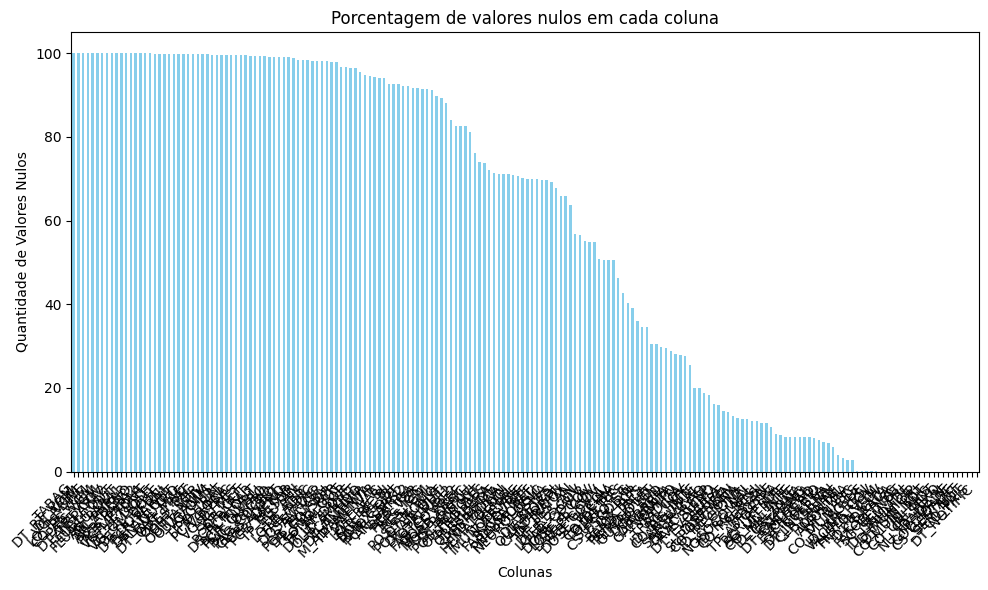

In [52]:
# Cria um gráfico de barras mostrando a quantidade de nulos que cada coluna tem
null_count = (df.isnull().mean()* 100).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
null_count.plot(kind='bar', color='skyblue')
plt.title('Porcentagem de valores nulos em cada coluna')
plt.xlabel('Colunas')
plt.ylabel('Quantidade de Valores Nulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


removendo as colunas que tem mais de 80% dos dados nulos

In [53]:
df_copied = df.copy()

null_percentage = df_copied.isnull().mean() * 100

# Seleciona as colunas com mais de 75% de valores nulos
columns_to_drop = null_percentage[null_percentage > 80].index.tolist()
# print(columns_to_drop)

df_copied.drop(columns=columns_to_drop, inplace=True)

df_copied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277304 entries, 0 to 277303
Columns: 106 entries, DT_NOTIFIC to REINF
dtypes: float64(55), int64(7), object(44)
memory usage: 224.3+ MB


Vamos analisar agora a coluna De target e filtrar por ela os valores nulos

In [54]:
# ------------||-------------------
# Mostrando os nulos da coluna target
df_copied['CLASSI_FIN'].isna().mean()

0.03891036551942994

In [55]:
# Retirando os nulos da coluna de classificação final
df_filter = df_copied.dropna(subset=['CLASSI_FIN']).copy()

In [56]:
# Verificando a quantidade de nulos das colunas, ordenando do maior para o menor
df_filter.isna().sum().sort_values(ascending=False)

POS_PCRFLU    200872
DT_ENTUTI     196842
POS_PCROUT    193916
OUTRO_DES     190998
PUERPERA      189156
               ...  
FATOR_RISC         0
SEM_NOT            0
HISTO_VGM          0
DT_DIGITA          0
DT_NOTIFIC         0
Length: 106, dtype: int64

Removendo as linhas inteiramente nulas

In [57]:
df_filter.dropna(how='all', inplace=True)
df_filter.isna().sum().sort_values(ascending=False)

POS_PCRFLU    200872
DT_ENTUTI     196842
POS_PCROUT    193916
OUTRO_DES     190998
PUERPERA      189156
               ...  
FATOR_RISC         0
SEM_NOT            0
HISTO_VGM          0
DT_DIGITA          0
DT_NOTIFIC         0
Length: 106, dtype: int64

In [58]:
df_filter.info(max_cols=107)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266514 entries, 0 to 277303
Data columns (total 106 columns):
 #    Column      Non-Null Count   Dtype  
---   ------      --------------   -----  
 0    DT_NOTIFIC  266514 non-null  object 
 1    SEM_NOT     266514 non-null  int64  
 2    DT_SIN_PRI  266514 non-null  object 
 3    SEM_PRI     266514 non-null  int64  
 4    SG_UF_NOT   266514 non-null  object 
 5    ID_REGIONA  232597 non-null  object 
 6    CO_REGIONA  232597 non-null  float64
 7    ID_MUNICIP  266514 non-null  object 
 8    CO_MUN_NOT  266514 non-null  int64  
 9    ID_UNIDADE  266514 non-null  object 
 10   CO_UNI_NOT  266514 non-null  int64  
 11   CS_SEXO     266514 non-null  object 
 12   DT_NASC     266433 non-null  object 
 13   NU_IDADE_N  266514 non-null  int64  
 14   TP_IDADE    266514 non-null  int64  
 15   COD_IDADE   266514 non-null  object 
 16   CS_GESTANT  266514 non-null  int64  
 17   CS_RACA     266514 non-null  float64
 18   CS_ESCOL_N  172044 non

In [59]:
# Quantidade de linhas duplicadas
df_filter.duplicated().sum()

190

Removendo as linhas duplicadas

In [60]:
df_filter.drop_duplicates(inplace=True)

### Tratando as colunas

Ajustando os valores de colunas que tem dados nulos para o valor de 9.0 que é ignorado

In [61]:

list_colunas_tratar = [
'PUERPERA', 'SURTO_SG', 'GARGANTA', 'DIARREIA', 'VOMITO',
'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA',
'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL',
'OBESIDADE', 'OUT_MORBI', 'VACINA', 'ANTIVIRAL',
'POS_PCRFLU', 'POS_PCROUT', 'DOR_ABD', 'FADIGA', 'PERD_OLFT',
'PERD_PALA', 'TRAT_COV', 'CO_DETEC', 'CS_ESCOL_N', 'ESTRANG',
'RES_AN', 'TP_TES_AN', 'TOMO_RES']


for i in list_colunas_tratar:
    
    try:
        frequencia = df_filter[i].value_counts()

        total_registros = df_filter[i].count()


        porcentagens = (frequencia / total_registros) * 100

        print(f'\n\nPorcentagens -- {i}  - \n{porcentagens}:\n')


        # Colocando os valores de 6.0 para 9
        df_filter[i].replace(6.0, 9, inplace=True)

        # Preenchendo os valores vazios como indefinidos
        df_filter[i].fillna(value=9, inplace=True)
        print('\n\n',df_filter[i].describe())

    except:
        print(f'Coluna que deu errada: {i}')




Porcentagens -- PUERPERA  - 
2.0    97.988825
9.0     1.157557
1.0     0.853618
Name: PUERPERA, dtype: float64:



 count    266324.000000
mean          6.988837
std           3.170683
min           1.000000
25%           2.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: PUERPERA, dtype: float64


Porcentagens -- SURTO_SG  - 
2.0    84.791420
9.0     9.715088
1.0     5.493492
Name: SURTO_SG, dtype: float64:



 count    266324.000000
mean          4.978252
std           3.500726
min           1.000000
25%           2.000000
50%           2.000000
75%           9.000000
max           9.000000
Name: SURTO_SG, dtype: float64


Porcentagens -- GARGANTA  - 
2.0    81.679393
1.0    15.318993
9.0     3.001614
Name: GARGANTA, dtype: float64:



 count    266324.000000
mean          3.960766
std           3.281809
min           1.000000
25%           2.000000
50%           2.000000
75%           9.000000
max           9.000000
Name: GARGANTA, dtype: float64



Criando a coluna coriza a partir da coluna Outro_sin

In [62]:
# Adicione uma nova coluna 'Coriza' com valor padrão como 0
df_filter['Coriza'] = 0

df_filter['OUTRO_DES'].fillna(value='sem sintomas', inplace=True)

# Verifique se a string 'coriza' está presente em 'outro_sin' e atualize 'Coriza' para 1
df_filter.loc[df_filter['OUTRO_DES'].str.contains('CORIZA', case=False), 'Coriza'] = 1


In [63]:
df_filter[['Coriza', 'OUTRO_DES']].head(30)

# Criado uma coluna somente para a Coriza que é um sintoma importante no caso de gripes

,Coriza,OUTRO_DES
0,0,sem sintomas
1,0,sem sintomas
2,0,sem sintomas
3,0,sem sintomas
4,0,sem sintomas
5,0,sem sintomas
6,0,CHEGA EM VM
7,0,sem sintomas
8,0,sem sintomas
9,0,sem sintomas


In [64]:
# Quantidade de vezes que o sintoma coriza apareceu.
df_filter['Coriza'].sum()

26832

Removendo as colunas de outros sintomas, por não sabermos que outros sintomas são esses

In [65]:
# Verificando colunas com formatos diferentes e dados como datas

lista_colunas_analise = [
    'RAIOX_RES', 'DT_RAIOX', 'DT_PCR', 'DT_EVOLUCA', 'DOSE_1_COV', 'DOSE_2_COV', 'DOSE_REF', 'FAB_COV_1',
    'FAB_COV_2', 'FAB_COVREF', 'LAB_PR_COV', 'LOTE_1_COV', 'LOTE_2_COV', 'LOTE_REF'
]


for i in lista_colunas_analise:
    
    try:
        frequencia = df_filter[i].value_counts()

        total_registros = df_filter[i].count()


        porcentagens = (frequencia / total_registros) * 100

        print(f'\n\nPorcentagens -- {i}  - \n{porcentagens}:\n')

    except:
        print(f'Coluna que deu errada: {i}')



Porcentagens -- RAIOX_RES  - 
6.0    29.532025
2.0    23.474290
5.0    13.973839
1.0    11.622124
9.0    10.862652
3.0     5.835025
4.0     3.183920
6       0.435837
2       0.368742
5       0.214253
1       0.175350
9       0.168020
3       0.100361
4       0.053563
Name: RAIOX_RES, dtype: float64:



Porcentagens -- DT_RAIOX  - 
23/05/2023    0.502186
22/05/2023    0.494053
24/05/2023    0.493036
24/04/2023    0.491003
29/05/2023    0.477788
                ...   
31/01/2024    0.001017
08/02/2024    0.001017
24/05/4202    0.001017
14/02/2202    0.001017
23/12/2202    0.001017
Name: DT_RAIOX, Length: 437, dtype: float64:



Porcentagens -- DT_PCR  - 
07/06/2023    0.642639
30/05/2023    0.629366
18/05/2023    0.619964
25/05/2023    0.587334
02/06/2023    0.566318
                ...   
05/02/2024    0.000553
18/02/2024    0.000553
07/02/2024    0.000553
28/01/2024    0.000553
09/02/2024    0.000553
Name: DT_PCR, Length: 404, dtype: float64:



Porcentagens -- DT_EVOLUCA  - 
30/05/2

In [66]:
# criando uma copia do dataframe
df_final = df_filter.copy()

In [67]:
# Removendo colunas que não devem fazer efeito para a analise
colunas_remover = ['RAIOX_RES', 'DT_RAIOX', 'DT_PCR', 'DT_EVOLUCA', 'DT_RES_AN',
                   'DOSE_1_COV', 'DOSE_2_COV', 'DOSE_REF', 'FAB_COVREF', 'DT_ENTUTI',
                   'FAB_COV_1', 'FAB_COV_2', 'LAB_PR_COV', 'LOTE_1_COV', 'LOTE_2_COV',
                   'LOTE_REF', 'CO_RG_INTE', 'OUTRO_DES', 'OUTRO_SIN', 'ID_RG_INTE', 'CO_MU_INTE',
                   'DT_NOTIFIC', 'DT_SIN_PRI','DT_NASC', 'DT_INTERNA', 'DT_COLETA','DT_ENCERRA', 'DT_DIGITA']

df_final.drop(columns=colunas_remover, axis=1, inplace=True)

In [68]:
df_final.info(max_cols=100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266324 entries, 0 to 277303
Data columns (total 79 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   SEM_NOT     266324 non-null  int64  
 1   SEM_PRI     266324 non-null  int64  
 2   SG_UF_NOT   266324 non-null  object 
 3   ID_REGIONA  232439 non-null  object 
 4   CO_REGIONA  232439 non-null  float64
 5   ID_MUNICIP  266324 non-null  object 
 6   CO_MUN_NOT  266324 non-null  int64  
 7   ID_UNIDADE  266324 non-null  object 
 8   CO_UNI_NOT  266324 non-null  int64  
 9   CS_SEXO     266324 non-null  object 
 10  NU_IDADE_N  266324 non-null  int64  
 11  TP_IDADE    266324 non-null  int64  
 12  COD_IDADE   266324 non-null  object 
 13  CS_GESTANT  266324 non-null  int64  
 14  CS_RACA     266324 non-null  float64
 15  CS_ESCOL_N  266324 non-null  object 
 16  ID_PAIS     266324 non-null  object 
 17  CO_PAIS     266324 non-null  object 
 18  SG_UF       266257 non-null  object 
 19  ID

In [69]:
# Removendo agora todas os nulos
df_final.dropna(inplace=True)

Ajustando o tipo de valor das colunas

In [70]:
# Transformando para float as colunas para depois ser colocado como int
colunas_float = ['CS_ESCOL_N', 'TP_TES_AN', 'CO_RG_RESI', 'CO_PAIS', 'COD_IDADE', 'EVOLUCAO']

df_final[colunas_float] = df_final[colunas_float].astype('float')

Vendo o formato dos campos, colocar essa parte mais para cima quando for finalizado o modelo

In [71]:
colunas_int= ['PUERPERA', 'SURTO_SG', 'GARGANTA', 'DIARREIA', 'VOMITO',
'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA',
'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL',
'OBESIDADE', 'OUT_MORBI', 'VACINA', 'ANTIVIRAL',
'POS_PCRFLU', 'POS_PCROUT', 'DOR_ABD', 'FADIGA','CS_ESCOL_N', 'PERD_OLFT',
'PERD_PALA', 'TRAT_COV', 'CO_DETEC', 'ESTRANG',
'RES_AN', 'TP_TES_AN', 'TOMO_RES', 'CO_REGIONA', 'CS_RACA', 'CO_MUN_RES', 'CS_ZONA', 'NOSOCOMIAL',
'AVE_SUINO', 'FEBRE', 'TOSSE', 'DISPNEIA', 'DESC_RESP', 'SATURACAO',
'FATOR_RISC', 'HOSPITAL', 'UTI', 'SUPORT_VEN', 'AMOSTRA', 'TP_AMOSTRA',
'PCR_RESUL', 'CLASSI_FIN', 'CRITERIO', 'HISTO_VGM', 'VACINA_COV',
'FNT_IN_COV', 'REINF', 'CO_PAIS', 'COD_IDADE', 'CO_RG_RESI' , 'EVOLUCAO']

# df_final[colunas_data] =  df_final[colunas_data].astype('datetime64')
for i in  colunas_int:
    print(i)
    df_final[i] =  df_final[i].astype('Int32')
    
df_final.head()

PUERPERA
SURTO_SG
GARGANTA
DIARREIA
VOMITO
CARDIOPATI
HEMATOLOGI
SIND_DOWN
HEPATICA
ASMA
DIABETES
NEUROLOGIC
PNEUMOPATI
IMUNODEPRE
RENAL
OBESIDADE
OUT_MORBI
VACINA
ANTIVIRAL
POS_PCRFLU
POS_PCROUT
DOR_ABD
FADIGA
CS_ESCOL_N
PERD_OLFT
PERD_PALA
TRAT_COV
CO_DETEC
ESTRANG
RES_AN
TP_TES_AN
TOMO_RES
CO_REGIONA
CS_RACA
CO_MUN_RES
CS_ZONA
NOSOCOMIAL
AVE_SUINO
FEBRE
TOSSE
DISPNEIA
DESC_RESP
SATURACAO
FATOR_RISC
HOSPITAL
UTI
SUPORT_VEN
AMOSTRA
TP_AMOSTRA
PCR_RESUL
CLASSI_FIN
CRITERIO
HISTO_VGM
VACINA_COV
FNT_IN_COV
REINF
CO_PAIS
COD_IDADE
CO_RG_RESI
EVOLUCAO


,SEM_NOT,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,VACINA,ANTIVIRAL,HOSPITAL,SG_UF_INTE,ID_MN_INTE,UTI,SUPORT_VEN,AMOSTRA,TP_AMOSTRA,PCR_RESUL,POS_PCRFLU,POS_PCROUT,CLASSI_FIN,CRITERIO,EVOLUCAO,HISTO_VGM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TP_TES_AN,RES_AN,ESTRANG,VACINA_COV,FNT_IN_COV,TRAT_COV,CO_DETEC,REINF,Coriza
1,9,8,PR,02RS METROPOLITANA,1356,CURITIBA,410690,HOSPITAL UNIVERSITARIO EVANGELICO MACKENZIE,15245,M,2,2,2002,6,4,5,BRASIL,1,PR,02RS METROPOLITANA,1356,CURITIBA,410690,1,9,2,2,1,1,2,1,1,1,9,9,9,2,9,9,9,9,9,9,9,9,9,9,9,9,9,2,1,PR,CURITIBA,2,3,1,1,1,2,1,2,1,1,0,9,9,9,9,9,9,4,2,2,2,2,9,2,0
3,12,11,PR,17RS LONDRINA,1371,LONDRINA,411370,HOSPITAL DO CORACAO UNIDADE BELA SUICA,7758391,F,92,3,3092,5,1,2,BRASIL,1,PR,17RS LONDRINA,1371,LONDRINA,411370,1,2,2,2,2,2,1,2,2,2,2,2,9,2,9,9,9,9,9,9,9,9,9,9,9,9,2,2,1,PR,LONDRINA,2,3,1,1,4,9,9,5,1,1,0,2,2,2,2,3,2,1,2,1,2,2,2,2,0
11,16,15,MS,EX ARS DE CAMPO GRANDE,1975,CAMPO GRANDE,500270,EBSERH HOSP UNIV MARIA APARECIDA PEDROSSIAN,9709,M,37,3,3037,6,4,2,BRASIL,1,MS,EX ARS DE CAMPO GRANDE,1975,CHAPADAO DO SUL,500295,1,2,2,2,1,1,2,1,1,1,2,2,9,2,9,9,9,9,9,9,9,9,9,9,9,9,9,9,1,MS,CAMPO GRANDE,1,1,1,1,1,1,2,1,1,1,0,2,2,2,2,9,9,4,2,1,2,9,2,2,0
12,17,16,RS,013 CRS,1609,SANTA CRUZ DO SUL,431680,HOSPITAL SANTA CRUZ,2254964,M,1,2,2001,6,1,5,BRASIL,1,RS,013 CRS,1609,HERVEIRAS,430957,2,9,2,2,2,1,2,1,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,1,9,2,1,RS,SANTA CRUZ DO SUL,1,1,1,1,2,9,9,4,1,9,0,2,2,2,2,9,9,4,2,2,2,2,9,2,0
13,15,14,SP,GVE XXI PRESIDENTE PRUDENTE,1346,PRESIDENTE PRUDENTE,354140,HOSPITAL UNIMED,7701810,M,1,2,2001,6,1,9,BRASIL,1,SP,GVE XXI PRESIDENTE PRUDENTE,1346,ALVARES MACHADO,350130,1,9,2,1,2,1,2,1,1,1,2,2,9,2,9,9,9,9,9,9,9,9,9,9,9,9,9,2,1,SP,PRESIDENTE PRUDENTE,2,2,1,1,1,2,1,2,1,1,0,2,2,2,2,9,9,4,2,2,2,2,9,2,1


In [72]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114217 entries, 1 to 277293
Data columns (total 79 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   SEM_NOT     114217 non-null  int64 
 1   SEM_PRI     114217 non-null  int64 
 2   SG_UF_NOT   114217 non-null  object
 3   ID_REGIONA  114217 non-null  object
 4   CO_REGIONA  114217 non-null  Int32 
 5   ID_MUNICIP  114217 non-null  object
 6   CO_MUN_NOT  114217 non-null  int64 
 7   ID_UNIDADE  114217 non-null  object
 8   CO_UNI_NOT  114217 non-null  int64 
 9   CS_SEXO     114217 non-null  object
 10  NU_IDADE_N  114217 non-null  int64 
 11  TP_IDADE    114217 non-null  int64 
 12  COD_IDADE   114217 non-null  Int32 
 13  CS_GESTANT  114217 non-null  int64 
 14  CS_RACA     114217 non-null  Int32 
 15  CS_ESCOL_N  114217 non-null  Int32 
 16  ID_PAIS     114217 non-null  object
 17  CO_PAIS     114217 non-null  Int32 
 18  SG_UF       114217 non-null  object
 19  ID_RG_RESI  114217 non-

In [73]:
# transformando as colunas de data no formato correto
# colunas_data = ['DT_NOTIFIC', 'DT_SIN_PRI','DT_NASC', 'DT_INTERNA', 'DT_COLETA','DT_ENCERRA', 'DT_DIGITA']

# for i in colunas_data:
#     df_final[i] = pd.to_datetime(df_final[i], format='%d/%m/%Y')

In [74]:
# Plotando por tipo e vendo se faltou alguma coisa

# df_float = df_final.select_dtypes(include=[float])
# df_float.head(20)

# # Plotando os int
# df_int = df_final.select_dtypes(include=[int])
# df_int.head(20)

# Plotando Object
df_object= df_final.select_dtypes(include=[object])
df_object.head(20)


# Analisar as colunas CO_REGIONA, CO_MUN_RES, CO_MUN_NOT, CO_UNI_NOT

,SG_UF_NOT,ID_REGIONA,ID_MUNICIP,ID_UNIDADE,CS_SEXO,ID_PAIS,SG_UF,ID_RG_RESI,ID_MN_RESI,SG_UF_INTE,ID_MN_INTE
1,PR,02RS METROPOLITANA,CURITIBA,HOSPITAL UNIVERSITARIO EVANGELICO MACKENZIE,M,BRASIL,PR,02RS METROPOLITANA,CURITIBA,PR,CURITIBA
3,PR,17RS LONDRINA,LONDRINA,HOSPITAL DO CORACAO UNIDADE BELA SUICA,F,BRASIL,PR,17RS LONDRINA,LONDRINA,PR,LONDRINA
11,MS,EX ARS DE CAMPO GRANDE,CAMPO GRANDE,EBSERH HOSP UNIV MARIA APARECIDA PEDROSSIAN,M,BRASIL,MS,EX ARS DE CAMPO GRANDE,CHAPADAO DO SUL,MS,CAMPO GRANDE
12,RS,013 CRS,SANTA CRUZ DO SUL,HOSPITAL SANTA CRUZ,M,BRASIL,RS,013 CRS,HERVEIRAS,RS,SANTA CRUZ DO SUL
13,SP,GVE XXI PRESIDENTE PRUDENTE,PRESIDENTE PRUDENTE,HOSPITAL UNIMED,M,BRASIL,SP,GVE XXI PRESIDENTE PRUDENTE,ALVARES MACHADO,SP,PRESIDENTE PRUDENTE
15,MS,EX ARS DE CAMPO GRANDE,PARAISO DAS AGUAS,PRONTO ATENDIMENTO MEDICO LAURENTINA CORREA LEITE,M,BRASIL,MS,EX ARS DE CAMPO GRANDE,PARAISO DAS AGUAS,MS,CAMPO GRANDE
19,PR,17RS LONDRINA,LONDRINA,ISCAL,F,BRASIL,PR,17RS LONDRINA,LONDRINA,PR,LONDRINA
21,BA,NUCLEO REGIONAL DE SAUDE LESTE,SALVADOR,HOSPITAL GERAL ROBERTO SANTOS,F,BRASIL,BA,NUCLEO REGIONAL DE SAUDE LESTE,SALVADOR,BA,SALVADOR
22,BA,NUCLEO REGIONAL DE SAUDE LESTE,SALVADOR,HOSPITAL SAO RAFAEL,F,BRASIL,BA,NUCLEO REGIONAL DE SAUDE LESTE,LAURO DE FREITAS,BA,SALVADOR
28,MG,CORONEL FABRICIANO,TIMOTEO,HOSPITAL E MATERNIDADE DE TIMOTEO,F,BRASIL,MG,CORONEL FABRICIANO,TIMOTEO,MG,TIMOTEO


In [75]:
# Usando o label encoder para as colunas de itens objetos
colunas_objetos = df_object.columns

le= LabelEncoder()

for i in colunas_objetos:
    print(i)
    le.fit(df_final[i])
    df_final[i] = le.transform(df_final[i])

df_final[colunas_objetos]

SG_UF_NOT
ID_REGIONA
ID_MUNICIP
ID_UNIDADE
CS_SEXO
ID_PAIS
SG_UF
ID_RG_RESI
ID_MN_RESI
SG_UF_INTE
ID_MN_INTE


,SG_UF_NOT,ID_REGIONA,ID_MUNICIP,ID_UNIDADE,CS_SEXO,ID_PAIS,SG_UF,ID_RG_RESI,ID_MN_RESI,SG_UF_INTE,ID_MN_INTE
1,15,33,284,1556,2,0,15,34,1046,15,286
3,15,68,554,480,0,0,15,80,1978,15,558
11,9,122,170,140,2,0,9,144,872,9,171
12,18,24,843,1349,2,0,18,25,1425,18,846
13,21,141,775,1494,2,0,21,163,113,21,779
...,...,...,...,...,...,...,...,...,...,...,...
277286,21,144,802,1436,0,0,21,166,2936,21,805
277288,9,122,170,1241,0,0,9,144,673,9,171
277289,21,129,386,317,2,0,21,148,3385,21,390
277290,9,122,170,1771,0,0,9,144,673,9,171


# Modeling
Iniciando a modelagem do problema e separando em treino e teste

In [91]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, balanced_accuracy_score, roc_auc_score, recall_score

### Teste para as melhores colunas

In [77]:
df_final.head(5)

,SEM_NOT,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,VACINA,ANTIVIRAL,HOSPITAL,SG_UF_INTE,ID_MN_INTE,UTI,SUPORT_VEN,AMOSTRA,TP_AMOSTRA,PCR_RESUL,POS_PCRFLU,POS_PCROUT,CLASSI_FIN,CRITERIO,EVOLUCAO,HISTO_VGM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TP_TES_AN,RES_AN,ESTRANG,VACINA_COV,FNT_IN_COV,TRAT_COV,CO_DETEC,REINF,Coriza
1,9,8,15,33,1356,284,410690,1556,15245,2,2,2,2002,6,4,5,0,1,15,34,1356,1046,410690,1,9,2,2,1,1,2,1,1,1,9,9,9,2,9,9,9,9,9,9,9,9,9,9,9,9,9,2,1,15,286,2,3,1,1,1,2,1,2,1,1,0,9,9,9,9,9,9,4,2,2,2,2,9,2,0
3,12,11,15,68,1371,554,411370,480,7758391,0,92,3,3092,5,1,2,0,1,15,80,1371,1978,411370,1,2,2,2,2,2,1,2,2,2,2,2,9,2,9,9,9,9,9,9,9,9,9,9,9,9,2,2,1,15,558,2,3,1,1,4,9,9,5,1,1,0,2,2,2,2,3,2,1,2,1,2,2,2,2,0
11,16,15,9,122,1975,170,500270,140,9709,2,37,3,3037,6,4,2,0,1,9,144,1975,872,500295,1,2,2,2,1,1,2,1,1,1,2,2,9,2,9,9,9,9,9,9,9,9,9,9,9,9,9,9,1,9,171,1,1,1,1,1,1,2,1,1,1,0,2,2,2,2,9,9,4,2,1,2,9,2,2,0
12,17,16,18,24,1609,843,431680,1349,2254964,2,1,2,2001,6,1,5,0,1,18,25,1609,1425,430957,2,9,2,2,2,1,2,1,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,1,9,2,1,18,846,1,1,1,1,2,9,9,4,1,9,0,2,2,2,2,9,9,4,2,2,2,2,9,2,0
13,15,14,21,141,1346,775,354140,1494,7701810,2,1,2,2001,6,1,9,0,1,21,163,1346,113,350130,1,9,2,1,2,1,2,1,1,1,2,2,9,2,9,9,9,9,9,9,9,9,9,9,9,9,9,2,1,21,779,2,2,1,1,1,2,1,2,1,1,0,2,2,2,2,9,9,4,2,2,2,2,9,2,1


In [78]:
# Teste para encontrar as melhores colunas
colunas_para_previsao = df_final[['CS_SEXO', 'NU_IDADE_N','CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'NOSOCOMIAL',
                                  'AVE_SUINO','FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA',
                                  'VOMITO','PUERPERA','FATOR_RISC','CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES',
                                  'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'VACINA','Coriza', 'CLASSI_FIN']]
colunas_para_previsao.head()

,CS_SEXO,NU_IDADE_N,CS_GESTANT,CS_RACA,CS_ESCOL_N,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,VACINA,Coriza,CLASSI_FIN
1,2,2,6,4,5,2,2,1,1,2,1,1,1,9,9,9,2,9,9,9,9,9,9,9,9,9,9,9,9,0,2
3,0,92,5,1,2,2,2,2,2,1,2,2,2,2,2,9,2,9,9,9,9,9,9,9,9,9,9,9,2,0,5
11,2,37,6,4,2,2,2,1,1,2,1,1,1,2,2,9,2,9,9,9,9,9,9,9,9,9,9,9,9,0,1
12,2,1,6,1,5,2,2,2,1,2,1,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,9,0,4
13,2,1,6,1,9,2,1,2,1,2,1,1,1,2,2,9,2,9,9,9,9,9,9,9,9,9,9,9,9,1,2


In [79]:
# Separando em x e em y
colunas_x_teste_melhoria = [coluna for coluna in colunas_para_previsao.columns if coluna != 'CLASSI_FIN']


x = colunas_para_previsao[colunas_x_teste_melhoria]

y= colunas_para_previsao[['CLASSI_FIN']]

### Todas as colunas

In [80]:
# Separando em x e em y
colunas_x = [coluna for coluna in df_final.columns if coluna != 'CLASSI_FIN']


x = df_final[colunas_x]

y= df_final[['CLASSI_FIN']]

In [81]:
df_final['CLASSI_FIN'].value_counts()/len(df_final)*100

4    56.624671
2    20.995999
5    16.466901
1     4.789129
3       1.1233
Name: CLASSI_FIN, dtype: Float64

In [82]:
# Separando em treino e teste
x_train,x_test, y_train, y_test =  train_test_split(x, y, test_size=0.25,stratify=y,  random_state=42 )

In [83]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(85662, 78)
(28555, 78)
(85662, 1)
(28555, 1)


## LogisticRegression

In [84]:
lr =  LogisticRegression()

lr.fit(x_train, y_train)


c:\Users\gusta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gusta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
y_pred_lr_test = lr.predict(x_test)
y_pred_lr_train = lr.predict(x_train)


# Acurácia
print(f'Acurácia Teste: {accuracy_score(y_test, y_pred_lr_test)*100}%')
print(f'Acurácia Treino: {accuracy_score(y_train, y_pred_lr_train)*100}%')
print('============================================================= \n')

# F1-score
print(f'f1_score Test: {f1_score(y_test, y_pred_lr_test, average="weighted")*100}%')
print(f'f1_score Treino: {f1_score(y_train, y_pred_lr_train, average="weighted")*100}%')
print('============================================================= \n')

# Precisão
print(f'Precisão Teste: {precision_score(y_test, y_pred_lr_test, average="weighted")*100}%')
print(f'Precisão Treino: {precision_score(y_train, y_pred_lr_train, average="weighted")*100}%')
print('============================================================= \n')

# Recall
print(f'Recall Teste: {recall_score(y_test, y_pred_lr_test, average="weighted")*100}%')
print(f'Recall Treino: {recall_score(y_train, y_pred_lr_train, average="weighted")*100}%')
print('============================================================= \n')

# Área sob a curva ROC
print(f'ROC Teste: {roc_auc_score(y_test, lr.predict_proba(x_test), multi_class="ovr")*100}%')


Acurácia Teste: 56.5680266153038%
Acurácia Treino: 56.607363825266745%

f1_score Test: 41.28781074983421%
f1_score Treino: 41.314900648098686%

Precisão Teste: 40.92894368491478%
Precisão Treino: 41.70894428057292%



c:\Users\gusta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gusta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Recall Teste: 56.5680266153038%
Recall Treino: 56.607363825266745%

ROC Teste: 51.58313087250972%


## KNN

In [93]:
# Colocando para buscar os 5 vizinhos mais próximos
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train, y_train)

c:\Users\gusta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [94]:
y_pred_knn_test = knn.predict(x_test)
y_pred_knn_train = knn.predict(x_train)


# Acurácia
print(f'Acurácia Teste: {accuracy_score(y_test, y_pred_knn_test)*100}%')
print(f'Acurácia Treino: {accuracy_score(y_train, y_pred_knn_train)*100}%')
print('============================================================= \n')

# F1-score
print(f'f1_score Test: {f1_score(y_test, y_pred_knn_test, average="weighted")*100}%')
print(f'f1_score Treino: {f1_score(y_train, y_pred_knn_train, average="weighted")*100}%')
print('============================================================= \n')

# Precisão
print(f'Precisão Teste: {precision_score(y_test, y_pred_knn_test, average="weighted")*100}%')
print(f'Precisão Treino: {precision_score(y_train, y_pred_knn_train, average="weighted")*100}%')
print('============================================================= \n')

# Recall
print(f'Recall Teste: {recall_score(y_test, y_pred_knn_test, average="weighted")*100}%')
print(f'Recall Treino: {recall_score(y_train, y_pred_knn_train, average="weighted")*100}%')
print('============================================================= \n')

# Área sob a curva ROC
print(f'ROC Teste: {roc_auc_score(y_test, knn.predict_proba(x_test), multi_class="ovr")*100}%')
print(f'ROC Treino: {roc_auc_score(y_train, knn.predict_proba(x_train), multi_class="ovr")*100}%')


Acurácia Teste: 72.00140080546315%
Acurácia Treino: 78.22138170950946%

f1_score Test: 70.39256652944428%
f1_score Treino: 76.98355335816504%

Precisão Teste: 70.32869228163277%
Precisão Treino: 77.38476999848591%

Recall Teste: 72.00140080546315%
Recall Treino: 78.22138170950946%

ROC Teste: 81.04707010751075%
ROC Treino: 94.90644829163364%


##  Naive Bayes

In [88]:
# Criando o classificador Naive Bayes
nb = GaussianNB()

# Treinando o modelo
nb.fit(x_train, y_train)


c:\Users\gusta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [89]:
# Predições nos conjuntos de teste e treino
y_pred_nb_test = nb.predict(x_test)
y_pred_nb_train = nb.predict(x_train)

# Acurácia
print(f'Acurácia Teste: {accuracy_score(y_test, y_pred_nb_test)*100}%')
print(f'Acurácia Treino: {accuracy_score(y_train, y_pred_nb_train)*100}%')
print('============================================================= \n')

# F1-score
print(f'f1_score Test: {f1_score(y_test, y_pred_nb_test, average="weighted")*100}%')
print(f'f1_score Treino: {f1_score(y_train, y_pred_nb_train, average="weighted")*100}%')
print('============================================================= \n')

# Precisão
print(f'Precisão Teste: {precision_score(y_test, y_pred_nb_test, average="weighted")*100}%')
print(f'Precisão Treino: {precision_score(y_train, y_pred_nb_train, average="weighted")*100}%')
print('============================================================= \n')

# Recall
print(f'Recall Teste: {recall_score(y_test, y_pred_nb_test, average="weighted")*100}%')
print(f'Recall Treino: {recall_score(y_train, y_pred_nb_train, average="weighted")*100}%')
print('============================================================= \n')

# Área sob a curva ROC
print(f'ROC Teste: {roc_auc_score(y_test, nb.predict_proba(x_test), multi_class="ovr")*100}%')
print(f'ROC Treino: {roc_auc_score(y_train, nb.predict_proba(x_train), multi_class="ovr")*100}%')

Acurácia Teste: 56.43144808264752%
Acurácia Treino: 56.295673694286855%

f1_score Test: 49.266342110467484%
f1_score Treino: 49.16679928601024%

Precisão Teste: 51.404473167762035%
Precisão Treino: 51.247170339696254%

Recall Teste: 56.43144808264752%
Recall Treino: 56.295673694286855%



c:\Users\gusta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gusta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ROC Teste: 66.13512844165314%
ROC Treino: 66.24288356518085%


In [92]:
# Criar o classificador SVM
svm = SVC()

# Treinar o modelo SVM
svm.fit(x_train, y_train)

c:\Users\gusta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [95]:
# Predições nos conjuntos de teste e treino
y_pred_svm_test = svm.predict(x_test)
y_pred_svm_train = svm.predict(x_train)

# Acurácia
print(f'Acurácia Teste: {accuracy_score(y_test, y_pred_svm_test)*100}%')
print(f'Acurácia Treino: {accuracy_score(y_train, y_pred_svm_train)*100}%')
print('============================================================= \n')

# F1-score
print(f'f1_score Test: {f1_score(y_test, y_pred_svm_test, average="weighted")*100}%')
print(f'f1_score Treino: {f1_score(y_train, y_pred_svm_train, average="weighted")*100}%')
print('============================================================= \n')

# Precisão
print(f'Precisão Teste: {precision_score(y_test, y_pred_svm_test, average="weighted")*100}%')
print(f'Precisão Treino: {precision_score(y_train, y_pred_svm_train, average="weighted")*100}%')
print('============================================================= \n')

# Recall
print(f'Recall Teste: {recall_score(y_test, y_pred_svm_test, average="weighted")*100}%')
print(f'Recall Treino: {recall_score(y_train, y_pred_svm_train, average="weighted")*100}%')
print('============================================================= \n')

# Área sob a curva ROC
print(f'ROC Teste: {roc_auc_score(y_test, svm.predict_proba(x_test), multi_class="ovr")*100}%')
print(f'ROC Treino: {roc_auc_score(y_train, svm.predict_proba(x_train), multi_class="ovr")*100}%')